In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from itertools import combinations
from collections import Counter
import numpy as np
import statistics as sts
retval = os.getcwd()
#print ("current dir %s" %retval)

#### TABLAS : 
###### VIVIENDA // HOGAR // SOCIODEMOGRÁFICO // CUESTIONARIO 1 // CUESTIONARIO 2 (2017,2020) // LÍNEAS DE POBREZA POR INGRESOS

In [28]:
df_v = pd.read_csv( r"C:\Users\jsmg2\Desktop\INGOV\datos\ENOE\ENOEN_2020_4t\conjunto_de_datos_viv_enoen_2020_4t\conjunto_de_datos\conjunto_de_datos_viv_enoen_2020_4t.csv",encoding='latin-1')
#df_v     ## 160353 rows × 26 columns
df_h = pd.read_csv( r"C:\Users\jsmg2\Desktop\INGOV\datos\ENOE\ENOEN_2020_4t\conjunto_de_datos_hog_enoen_2020_4t\conjunto_de_datos\conjunto_de_datos_hog_enoen_2020_4t.csv",encoding='latin-1')
#df_h    ##  161220 rows × 37 columns
df_s = pd.read_csv( r"C:\Users\jsmg2\Desktop\INGOV\datos\ENOE\ENOEN_2020_4t\conjunto_de_datos_sdem_enoen_2020_4t\conjunto_de_datos\conjunto_de_datos_sdem_enoen_2020_4t.csv",encoding='latin-1')
#df_s    ##  356790 rows × 110 columns
df_c1 = pd.read_csv( r"C:\Users\jsmg2\Desktop\INGOV\datos\ENOE\ENOEN_2020_4t\conjunto_de_datos_coe1_enoen_2020_4t\conjunto_de_datos\conjunto_de_datos_coe1_enoen_2020_4t.csv",encoding='latin-1')
#df_c1    ## 287822 rows × 173 columns
df_c2 = pd.read_csv( r"C:\Users\jsmg2\Desktop\INGOV\datos\ENOE\ENOEN_2020_4t\conjunto_de_datos_coe2_enoen_2020_4t\conjunto_de_datos\conjunto_de_datos_coe2_enoen_2020_4t.csv",encoding='latin-1')
#df_c2    ## 287822 rows × 74 columns
df_c2_2017 = pd.read_csv( r"C:\Users\jsmg2\Desktop\INGOV\datos\ENOE\ENOEN_2017_1t\coe2t_enoe117\conjunto_de_datos\coe2t117.csv",encoding='latin-1')
#df_c2    ## 287822 rows × 74 columns
df_lppi = pd.read_csv( "C:/Users/jsmg2/Desktop/INGOV/datos/LINEAS DE BIENESTAR/LPPI/all_lppi.csv",encoding='latin-1')


C:\Users\jsmg2\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (39,42) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


### DROPPING VALUES QUE NO PERTENECEN A QRO

In [29]:
df_v.drop(df_v[df_v['CD_A'] != 36].index, inplace = True)                  ### VIVIENDA
#df_v  ## 2148 rows × 26 columns

In [30]:
df_h.drop(df_h[df_h['CD_A'] != 36].index, inplace = True)                 ### HOGAR
#df_h  ## 2169 rows × 37 columns

In [31]:
df_s.drop(df_s[df_s['CD_A'] != 36].index, inplace = True)                 ### SOCIODEMOGRÁFICO
#df_s  ## 5930 rows × 110 columns

In [32]:
df_c1.drop(df_c1[df_c1['CD_A'] != 36].index, inplace = True)              ### CUESTIONARIO 1
#df_c1  ## 4986 rows × 173 columns

In [33]:
df_c2.drop(df_c2[df_c2['CD_A'] != 36].index, inplace = True)              ### CUESTIONARIO 2
#df_c2  ## 4986 rows × 74 columns

In [34]:
df_c2_2017.drop(df_c2_2017[df_c2_2017['CD_A'] != 36].index, inplace = True)              ### CUESTIONARIO 2 2017
#df_c2  ## 4986 rows × 74 columns

### CAMPOS INTER-RELACIONADOS

In [35]:
## TABLA VIVIENDA
entidad_v = len(df_v['ENT'].unique()) ##Entidad 22, hace referencia a Querétaro
control_v = len(df_v['CON'].unique()) ##
vivienda_seleccionada_v = len(df_v['V_SEL'].unique())
#print(entidad_v, control_v, vivienda_seleccionada_v)

In [36]:
## TABLA hogar
entidad_h = len(df_h['ENT'].unique()) ##Entidad 22, hace referencia a Querétaro
control_h = len(df_h['CON'].unique()) ##
vivienda_seleccionada_h = len(df_v['V_SEL'].unique())         ## 1-5
hogar_h = len(df_h['N_HOG'].unique()) ## Hogar dentro de vivieno  1-6
muda_h = len(df_h['H_MUD'].unique()) ## Veces que se ha mudado  0-2
entrevista_completa_h = len(df_h['R_DEF'].unique()) ## Veces que se ha mudado  0-2
#print(entidad_h, control_h, vivienda_seleccionada_h, hogar_h, muda_h, entrevista_completa_h)

In [37]:
## TABLA sociodomografico
entidad_s = len(df_s['ENT'].unique()) ##Entidad 22, hace referencia a Querétaro
control_s = len(df_s['CON'].unique()) ##
vivienda_seleccionada_s = len(df_s['V_SEL'].unique())         ## 1-5
hogar_s = len(df_s['N_HOG'].unique()) ## Hogar dentro de vivieno  1-6
muda_s = len(df_s['H_MUD'].unique()) ## Veces que se ha mudado  0-2
renglon_s = len(df_s['N_REN'].unique()) ## Veces que se ha mudado  1-13
#print(entidad_s, control_s, vivienda_seleccionada_s, hogar_s, muda_s, renglon_s)

In [38]:
## TABLA cuestionario 1
entidad_c1 = len(df_c1['ENT'].unique()) ##Entidad 22, hace referencia a Querétaro
control_c1 = len(df_c1['CON'].unique()) ##
vivienda_seleccionada_c1 = len(df_c1['V_SEL'].unique())         ## 1-5
hogar_c1 = len(df_c1['N_HOG'].unique()) ## Hogar dentro de vivieno  1-6
muda_c1 = len(df_c1['H_MUD'].unique()) ## Veces que se ha mudado  0-2
renglon_c1 = len(df_c1['N_REN'].unique()) ## Veces que se ha mudado  1-13
#print(entidad_c1, control_c1, vivienda_seleccionada_c1, hogar_c1, muda_c1, renglon_c1)

In [39]:
## TABLA cuestionario 2
entidad_c2 = len(df_c2['ENT'].unique()) ##Entidad 22, hace referencia a Querétaro
control_c2 = len(df_c2['CON'].unique()) ##
vivienda_seleccionada_c2 = len(df_c2['V_SEL'].unique())         ## 1-5
hogar_c2 = len(df_c2['N_HOG'].unique()) ## Hogar dentro de vivieno  1-6
muda_c2 = len(df_c2['H_MUD'].unique()) ## Veces que se ha mudado  0-2
renglon_c2 = len(df_c2['N_REN'].unique()) ## Veces que se ha mudado  1-13
#print(entidad_c2, control_c2, vivienda_seleccionada_c2, hogar_c2, muda_c2, renglon_c2)

### ENTREVISTAS COMPLETAS

In [40]:
df_h.drop(df_h[df_h['R_DEF'] != 0].index, inplace = True)                 ### HOGAR
#df_h  ## 2169 rows × 37 columns  ---> 1771 rows × 37 columns

### RESIDENTE HABITUAL O NUEVO

In [41]:
df_s.drop(df_s[df_s['C_RES'] == 2].index, inplace = True)                 ### SOCIODEMOGRÁFICO
#df_s  ## 5930 rows × 110 columns  ----> 5829 rows × 110 columns

### RESIDENTE MAYOR DE 12 AÑOS

In [42]:
df_s.drop(df_s[df_s['EDA'] <= 11].index, inplace = True)                 ### SOCIODEMOGRÁFICO
#df_s  ## 5930 rows × 110 columns  ---- > 4989 rows × 110 columns

### NÚMERO DE RESIDENTES POR CASA

In [43]:
df_v = df_v.dropna(subset=['P1'])
control_1 = df_v['CON'].unique()
#control_1.shape
control_2 = df_c2['CON'].unique()
#control_2.shape
contador=0

for x in control_1:
    for y in control_2:
        if x == y:
            contador+=1
            #print(y)
        else:
            no_incluido=x
            #print(x)

df_c2.drop(df_c2[df_c2['CON'] == no_incluido].index, inplace = True)             
df_v.drop(df_v[df_v['CON'] == no_incluido].index, inplace = True)   

### FACTOR DE EXPANCIÓN

In [44]:
FAC_TRI=df_c2['FAC_TRI']               ### CUESTIONARIO 2
FAC_MEN=df_c2['FAC_MEN']  
FAC=df_c2_2017['FAC'] 
df_c2=df_c2.dropna(subset=['P6B2'])
df_c2_2017=df_c2_2017.dropna(subset=['P6B2'])

### INGRESO LABORAL

In [45]:
pobl_muestra=df_c2['FAC_TRI'].sum()
pers=df_v['P1'].unique()
re_pro=pers.mean()
df_c2['porcentaje_poblacional']= (df_c2['FAC_TRI']*100)/pobl_muestra
df_c2['ingreso_laboral_PP']= df_c2['P6B2']/re_pro


### INGRESO EXPANDIDO

In [46]:
df_c2['Ingreso_Expandido_TRI'] = df_c2['P6B2']*df_c2['FAC_TRI']
df_c2['Ingreso_Expandido_MEN'] = df_c2['P6B2']*df_c2['FAC_MEN']
df_c2_2017['Ingreso_Expandido_2017'] = df_c2_2017['P6B2']*df_c2_2017['FAC']


### INGRESO PER CÁPITA (IPC)

In [47]:
suma_MEN=sum(df_c2['Ingreso_Expandido_MEN'])
suma_FAC=sum(df_c2_2017['Ingreso_Expandido_2017'])
poblacion_2017=2038372
poblacion_2020=2368467
ipc_2t_2015=1597.43
ipc_2017=suma_FAC/poblacion_2017
ipc_1t_2020=2022.13
ipc_3t_2020=1730.97
ipc_4t_2020=suma_MEN/poblacion_2020


### GRAFICACIÓN DE INGRESO LABORAL PER CÁPITA 

(1000.0, 2300.0)

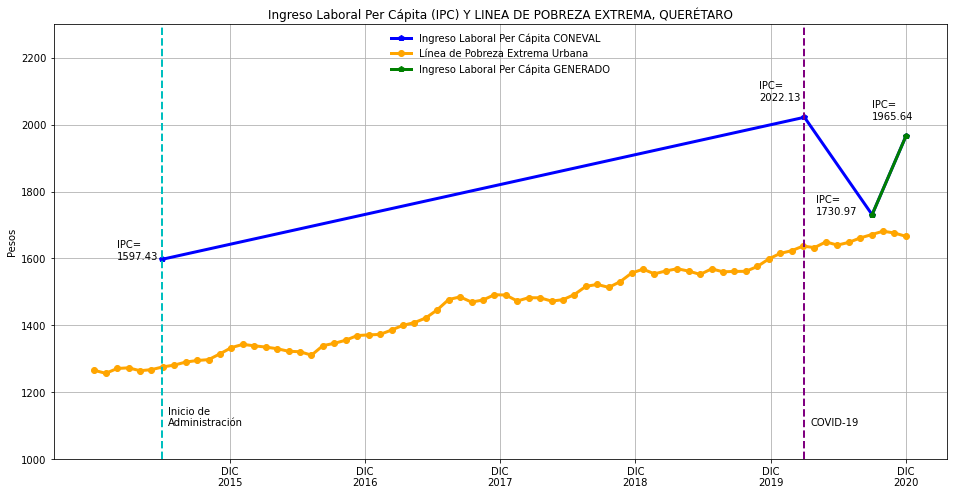

In [54]:
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
fig = plt.figure(figsize=(16, 8))
ax = plt.axes()
x=np.linspace(0,72,72)
plt.title('Ingreso Laboral Per Cápita (IPC) Y LINEA DE POBREZA EXTREMA, QUERÉTARO')
linea=[1597.43,2022.13,1730.97,1965.64]
xlinea=[6,63,69,72]
linea2=[1730.97,1965.64]
xlinea2=[69,72]
LPEI_rural=df_lppi['LPEI rural']
LPEI_urbano=df_lppi['LPEI urbano']
ax.plot(xlinea,linea,color='blue',marker='p',linewidth=3, label= "Ingreso Laboral Per Cápita CONEVAL")
ax.plot(x,LPEI_urbano,color='orange',marker='o',linewidth=3, label= "Línea de Pobreza Extrema Urbana")
ax.plot(xlinea2,linea2,color='green',marker='p',linewidth=3, label= "Ingreso Laboral Per Cápita GENERADO")
plt.xticks([ 12, 24, 36, 48, 60, 72, ],["DIC\n2015","DIC\n2016","DIC\n2017","DIC\n2018","DIC\n2019","DIC\n2020",])
plt.annotate('IPC=\n1597.43', xy=(6,ipc_2t_2015+10), xytext=(2,ipc_2t_2015))
plt.annotate('IPC=\n2022.13', xy=(63,ipc_1t_2020+10), xytext=(59,ipc_1t_2020+50))
plt.annotate('IPC=\n1730.97', xy=(69,ipc_3t_2020+10), xytext=(64,ipc_3t_2020))
plt.annotate('IPC=\n1965.64', xy=(72,ipc_4t_2020+10), xytext=(69,ipc_4t_2020+50))
plt.annotate('COVID-19', xy=(63,1100), xytext=(63.5,1100))
plt.annotate('Inicio de \nAdministración', xy=(6.5,1100), xytext=(6.5,1100))
plt.axvline(x=63, color='purple', linewidth=2.0, linestyle='--') 
plt.axvline(x=6, color='c', linewidth=2.0, linestyle='--') 
plt.ylabel('Pesos')
plt.legend(frameon=False,loc='upper center',ncol=1)
plt.grid()
plt.ylim([1000, 2300])

### PERSONAS DEBAJO DE LPE

In [49]:
df_c2.drop(df_c2[df_c2['ingreso_laboral_PP'] >= 1201.87].index, inplace = True)              ### CUESTIONARIO 2
#df_c2['porcentaje_poblacional'].sum()

In [50]:
df2 = pd.DataFrame(np.array([[2038300, 1597.43, 1275.98, 35.5], [2368467, 2022.13, 1632.51, 34.2],[2368467, 1730.97, 1681.61, 42.4], [2368467, 1965.64, 1666.24, 58.4]]),
                   columns=['Poblacion','IPC', 'LPE', 'PPDLPE'])
df2['Personas DLP'] = df2['Poblacion']*(df2['PPDLPE']/100)
df2['Personas SLP'] = df2['Poblacion']-df2['Personas DLP']


### GRAFICACIÓN DE PORCENTAJE DE PERSONAS DEBAJO DE LA LÍNEA DE POBREZA EXTREMA

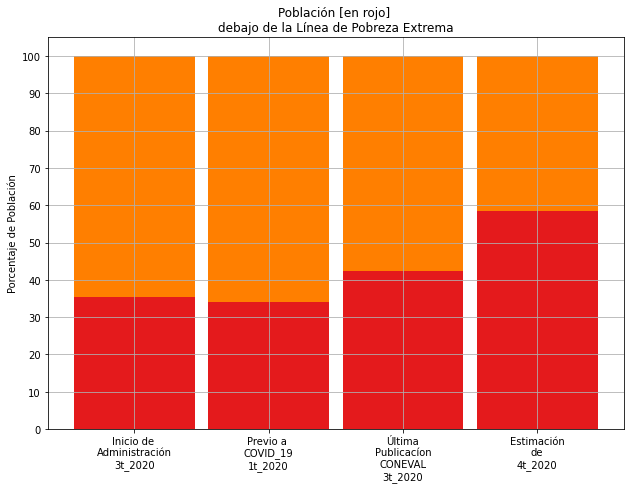

In [55]:
fig = plt.figure(figsize=(16, 8))
data = [[ 35.5, 34.2,  42.4, 58.4], [ 64.5, 65.8,  57.6,  41.6],]
columns = ('2t_2015','1t_2020','3t_2020','4t_2020')
rows = ['Habitanes Sobre LPE', 'Habitanes Debajo LPE']
values = np.arange(0, 110, 10)
value_increment = 1
colors = plt.cm.Set1(np.linspace(0, 0.5, len(rows)))
n_rows = len(data)
index = np.arange(len(columns)) + 0.3
bar_width = 0.9
from  matplotlib.ticker import FuncFormatter
y_offset = np.zeros(len(columns))
cell_text = []

for row in range(n_rows):
    plt.bar(index, data[row], bar_width, bottom=y_offset, color=colors[row])
    y_offset = y_offset + data[row]
    cell_text.append(['%1.1f' % (x / 1.0) for x in y_offset])

    
colors = colors[::-1]
cell_text.reverse()
plt.subplots_adjust(left=0.4, bottom=0.2)
plt.ylabel("Porcentaje de Población".format(value_increment))
plt.yticks(values * value_increment, ['%d' % val for val in values])
plt.xticks([.3,1.3,2.3,3.3],['Inicio de \nAdministración\n3t_2020','Previo a \nCOVID_19\n1t_2020','Última\nPublicacíon\nCONEVAL\n3t_2020','Estimación\nde\n4t_2020'])
plt.title('Población [en rojo] \ndebajo de la Línea de Pobreza Extrema')
plt.grid(True)
plt.show()